In [9]:
import mne
import numpy as np
from mne.preprocessing import ICA

raw = mne.io.read_raw_eeglab('rawdata/s01_060926_1n.set')

/var/folders/xm/d4rl6dl13c552z92yhdc3m4r0000gn/T/ipykernel_28468/1788940610.py:5: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab('rawdata/s01_060926_1n.set')


Fitting ICA to data using 33 channels (please be patient, this may take a while)


/var/folders/xm/d4rl6dl13c552z92yhdc3m4r0000gn/T/ipykernel_28468/2481517890.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 38.6s.


RuntimeError: No digitization points found.

In [5]:

# 应用1Hz高通和50Hz低通滤波器
raw.filter(l_freq=1, h_freq=50, method='fir')

# 手动移除眼睛闪烁的影响
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(raw)
ica.exclude = [0]  # 假设第一个成分是眼睛闪烁
raw = ica.apply(raw, exclude=ica.exclude)

# 纠正眼部和肌肉的伪迹
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
eog_indices, eog_scores = mne.preprocessing.ica.find_bads_eog(raw, ica)
ica.exclude = eog_indices
raw = ica.apply(raw, exclude=ica.exclude)


<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, FZ, F4, F8, FT7, FC3, FCZ, FC4, FT8, T3, C3, ...
 chs: 30 EEG
 custom_ref_applied: False
 dig: 30 items (30 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 500.0 Hz
>


Using matplotlib as 2D backend.


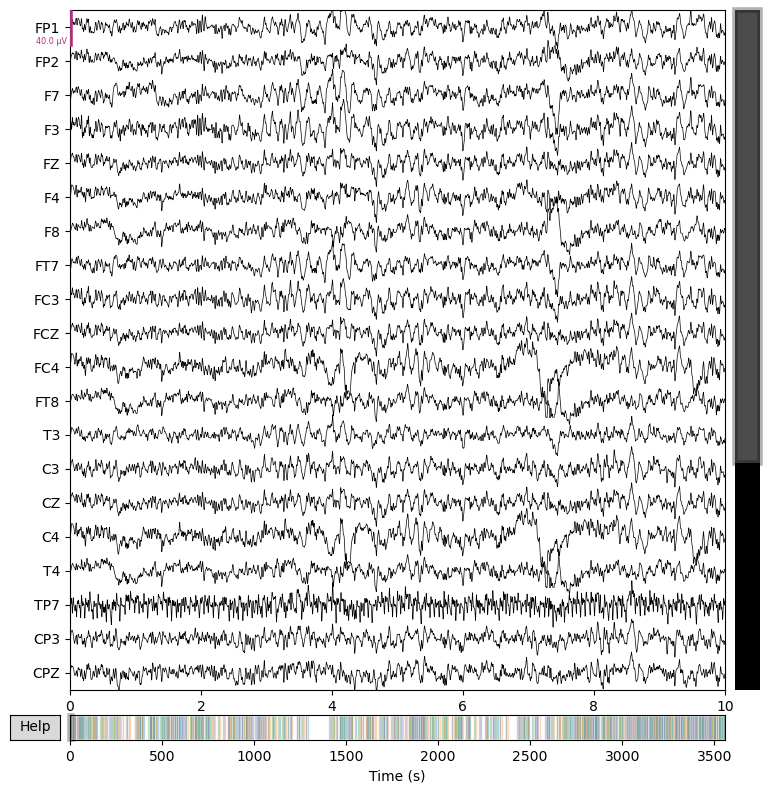

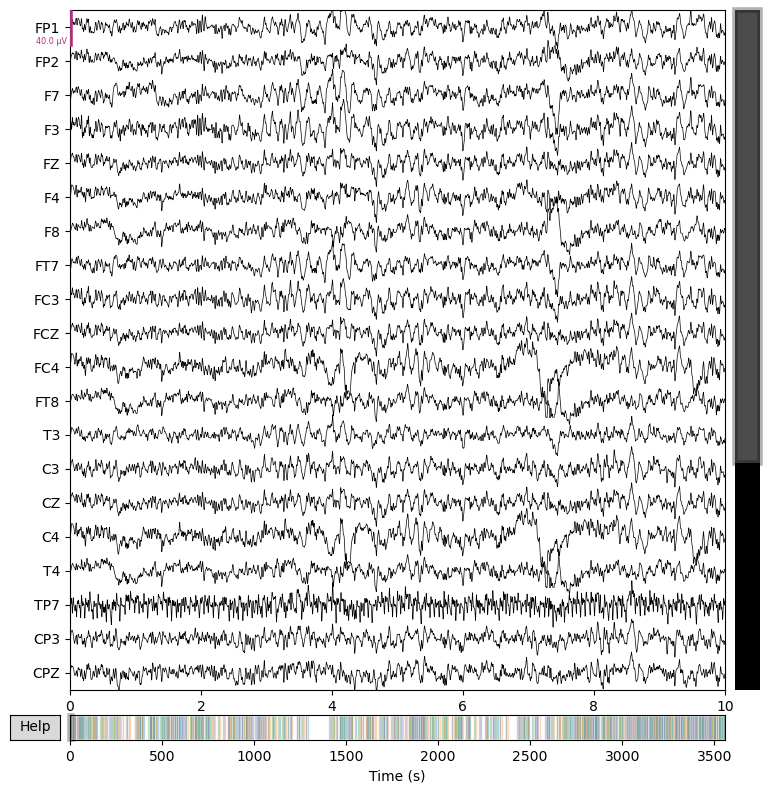

In [2]:
# Fit ICA
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(raw)

# Plot ICA components
ica.plot_components()

In [3]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['251', '252', '253', '254']


In [8]:
raw

<RawEEGLAB | s01_060227n.fdt, 30 x 1779280 (3558.6 s), ~45 kB, data not loaded>